<a href="https://colab.research.google.com/github/Sanjanah8/projects/blob/main/lung_cancer_diagnostician.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

relative_path = 'annotations.csv'
absolute_path = os.path.abspath(relative_path)
print("Absolute Path:", absolute_path)


Absolute Path: /content/annotations.csv


In [4]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)



Current Working Directory: /content


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("/content"))


['.config', 'sample_data']


In [11]:
!pip install tensorflow


In [14]:
import pandas as pd

annotations = pd.read_csv('/content/annotations.csv')
candidates = pd.read_csv('/content/candidates.csv')
sample_submission = pd.read_csv('/content/sampleSubmission.csv')

print(annotations.head())
print(candidates.head())
print(sample_submission.head())


                                           seriesuid      coordX      coordY  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222... -128.699421 -175.319272   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.783651 -211.925149   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...   69.639017 -140.944586   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...  -24.013824  192.102405   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...    2.441547  172.464881   

       coordZ  diameter_mm  
0 -298.387506     5.651471  
1 -227.121250     4.224708  
2  876.374496     5.786348  
3 -391.081276     8.143262  
4 -405.493732    18.545150  
                                           seriesuid  coordX  coordY  coordZ  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.08  -67.85 -311.92   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.21 -244.41 -245.17   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.66 -121.80 -286.62   
3  1.3.6.1.4.1.14519.5.2.

In [19]:
print(annotations.columns)
print(candidates.columns)



Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm'], dtype='object')
Index(['seriesuid', 'coordX', 'coordY', 'coordZ', 'class'], dtype='object')


In [20]:

print(annotations.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seriesuid    1186 non-null   object 
 1   coordX       1186 non-null   float64
 2   coordY       1186 non-null   float64
 3   coordZ       1186 non-null   float64
 4   diameter_mm  1186 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB
None


In [22]:
print(candidates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seriesuid  41544 non-null  object 
 1   coordX     41544 non-null  float64
 2   coordY     41543 non-null  float64
 3   coordZ     41543 non-null  float64
 4   class      41543 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.6+ MB
None


In [24]:
print(annotations['diameter_mm'].unique())
print(candidates['class'].unique())


[ 5.65147063  4.22470848  5.78634781 ...  4.3573681   4.27720254
 23.80291305]
[ 0.  1. nan]


In [67]:
print("\nAnnotations Summary Statistics:")
print(annotations.describe())

# Summary statistics for candidates
print("\nCandidates Summary Statistics:")
print(candidates.describe())


Annotations Summary Statistics:
            coordX       coordY       coordZ  diameter_mm
count  1186.000000  1186.000000  1186.000000  1186.000000
mean     -5.067547     8.428113  -160.159029     8.306527
std      84.468115    98.316003   279.829437     4.762033
min    -164.351031  -283.834336  -790.074799     3.253443
25%     -80.909225   -51.549643  -221.197808     5.107177
50%     -32.855132    18.787926  -167.615160     6.433600
75%      76.830069    67.245915  -109.735281     9.696301
max     164.763985   271.405521  1790.494057    32.270030

Candidates Summary Statistics:
              coordX         coordY         coordZ          class
count  551065.000000  551065.000000  551065.000000  551065.000000
mean       -2.005825       8.944721    -157.857852       0.002452
std        71.711619      89.428035     277.212320       0.049453
min      -201.113500    -317.330000    -895.220000       0.000000
25%       -62.126786     -35.780058    -224.790000       0.000000
50%       -17.271

In [68]:
print("\nAnnotations Missing Values:")
print(annotations.isnull().sum())

# Check for missing values in candidates
print("\nCandidates Missing Values:")
print(candidates.isnull().sum())


Annotations Missing Values:
seriesuid      0
coordX         0
coordY         0
coordZ         0
diameter_mm    0
dtype: int64

Candidates Missing Values:
seriesuid    0
coordX       0
coordY       0
coordZ       0
class        0
dtype: int64


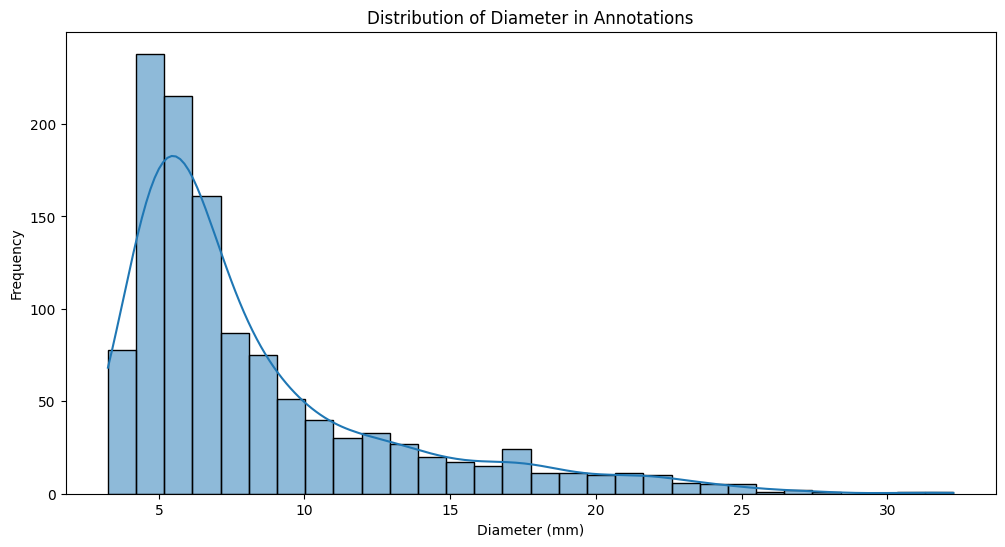

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(annotations['diameter_mm'], bins=30, kde=True)
plt.title('Distribution of Diameter in Annotations')
plt.xlabel('Diameter (mm)')
plt.ylabel('Frequency')
plt.show()

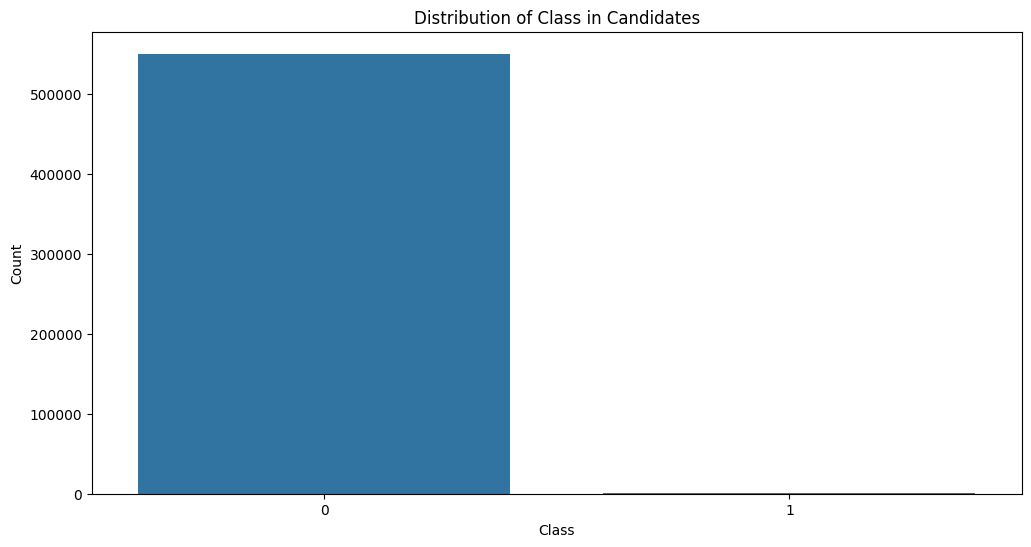

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=candidates, x='class')
plt.title('Distribution of Class in Candidates')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

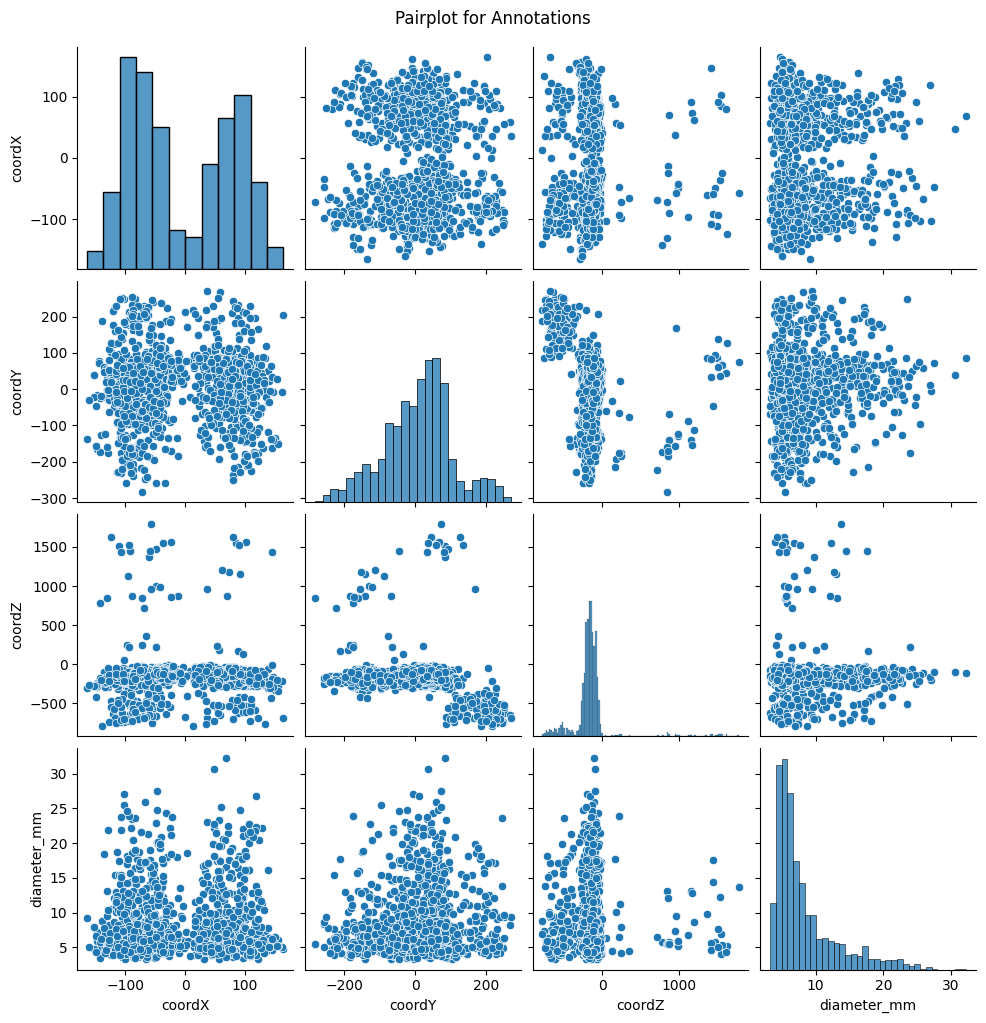

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(annotations)
plt.suptitle('Pairplot for Annotations', y=1.02)
plt.show()


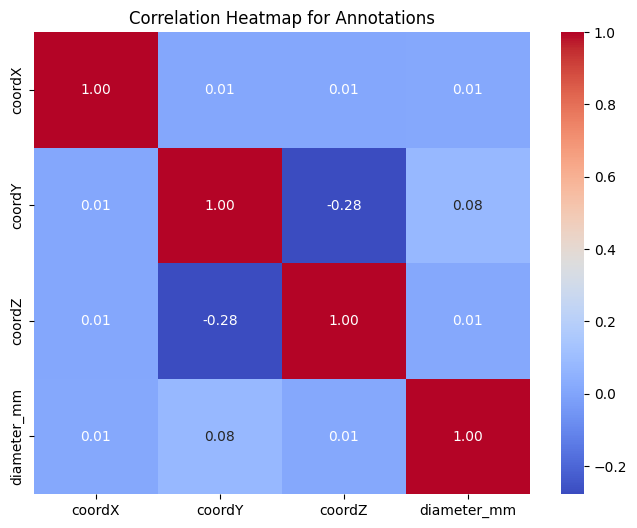

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(annotations.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Annotations')
plt.show()

AttributeError: PolyCollection.set() got an unexpected keyword argument 'X'

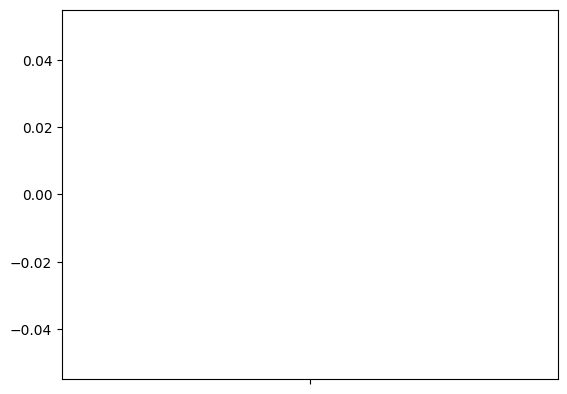

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
# Violin plot for diameter distribution across different classes
sns.violinplot(X='class', y='diameter_mm', data=annotations, palette='muted')
plt.title('Violin Plot of Diameter by Class')
plt.xlabel('Class')
plt.ylabel('Diameter (mm)')
plt.show()



TypeError: Axes.bxp() got an unexpected keyword argument 'X'

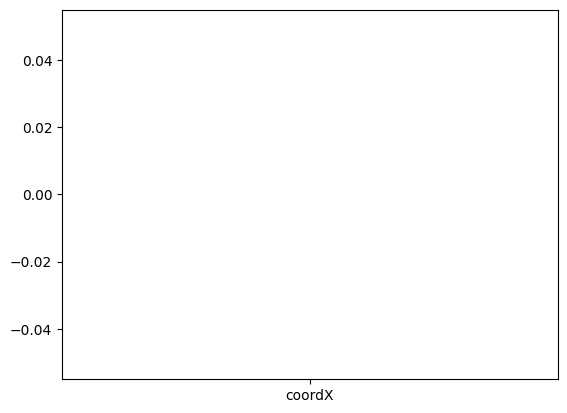

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot with strip plot for diameter
sns.boxplot(X='class', Y='diameter_mm', data=annotations, palette='coolwarm')
sns.stripplot(X='class', Y='diameter_mm', data=annotations, color='black', alpha=0.5, jitter=True)
plt.title('Box Plot with Strip Plot of Diameter by Class')
plt.xlabel('Class')
plt.ylabel('Diameter (mm)')
plt.show()



In [49]:
data = pd.merge(annotations, candidates[['seriesuid', 'class']], on='seriesuid')

In [18]:
data = pd.merge(candidates, annotations, on='seriesuid')
print(data.head())


                                           seriesuid  coordX_x  coordY_x  \
0  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...    -56.08    -67.85   
1  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...    -56.08    -67.85   
2  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...     53.21   -244.41   
3  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...     53.21   -244.41   
4  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...    103.66   -121.80   

   coordZ_x  class    coordX_y    coordY_y    coordZ_y  diameter_mm  
0   -311.92    0.0 -128.699421 -175.319272 -298.387506     5.651471  
1   -311.92    0.0  103.783651 -211.925149 -227.121250     4.224708  
2   -245.17    0.0 -128.699421 -175.319272 -298.387506     5.651471  
3   -245.17    0.0  103.783651 -211.925149 -227.121250     4.224708  
4   -286.62    0.0 -128.699421 -175.319272 -298.387506     5.651471  


In [42]:
data.dropna(inplace=True)
print(data)

                                               seriesuid  coordX_x   coordY_x  \
0      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.0800  -67.85000   
1      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  -56.0800  -67.85000   
2      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.2100 -244.41000   
3      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...   53.2100 -244.41000   
4      1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...  103.6600 -121.80000   
...                                                  ...       ...        ...   
52634  1.3.6.1.4.1.14519.5.2.1.6279.6001.123654356399...  -72.5400   39.83000   
52635  1.3.6.1.4.1.14519.5.2.1.6279.6001.123654356399...  -80.9400  -74.33000   
52636  1.3.6.1.4.1.14519.5.2.1.6279.6001.123654356399...  -80.9400  -74.33000   
52637  1.3.6.1.4.1.14519.5.2.1.6279.6001.123654356399...  -14.0401    1.35215   
52638  1.3.6.1.4.1.14519.5.2.1.6279.6001.123654356399...  -14.0401    1.35215   

         coordZ_x  class   

In [56]:
# Remove the 'seriesuid' column from the DataFrame before creating X
X = data.drop(['class', 'seriesuid'], axis=1).values
y = data['class'].values


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to float32
X_scaled = X_scaled.astype(np.float32)
y = y.astype(np.float32)

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.model_selection import train_test_split

# Example features and labels
X = data.drop('class',axis=1)
y = data['class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(f'Training features shape: {X_train.shape}')
print(f'Validation features shape: {X_val.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')


Training features shape: (42112, 8)
Validation features shape: (10529, 8)
Training labels shape: (42112,)
Validation labels shape: (10529,)


In [58]:
# Convert data to float32
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)


Epoch 1/10
1316/1316 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.9935 - val_loss: nan - val_accuracy: 0.9931
Epoch 2/10
1316/1316 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 3/10
1316/1316 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 4/10
1316/1316 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 5/10
1316/1316 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 6/10
1316/1316 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 7/10
1316/1316 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9939 - val_loss: nan - val_accuracy: 0.9931
Epoch 8/10
1316/1316 [============

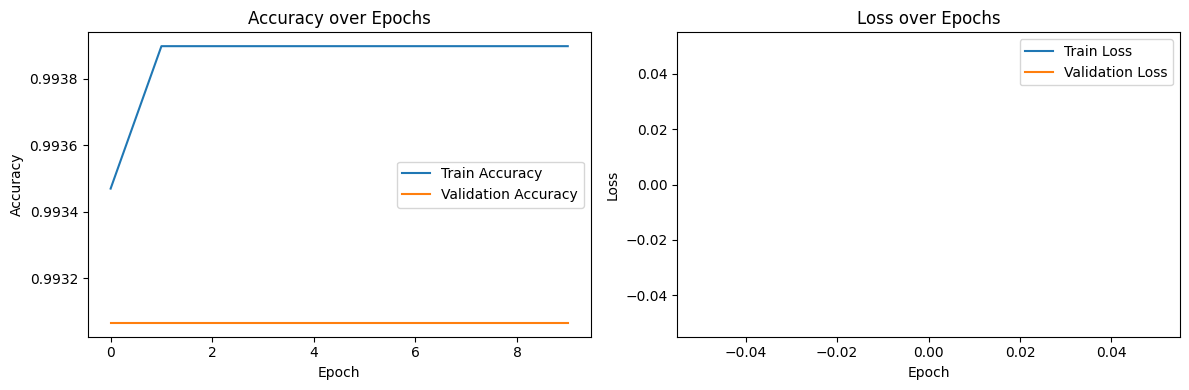

In [59]:
# Build a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.tight_layout()
plt.show()


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model and hyperparameters
rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 200]}

# Set up GridSearchCV
grid_rf = GridSearchCV(rf, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid_rf.predict(X_val_scaled)
y_proba = grid_rf.predict_proba(X_val_scaled)[:, 1]

# Calculate metrics
rf_results = {
    'Best Parameters': grid_rf.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("Random Forest Results:", rf_results)


KeyboardInterrupt: 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define model and hyperparameters
lr = LogisticRegression()
params = {'C': [0.01, 0.1, 1, 10]}

# Set up GridSearchCV
grid_lr = GridSearchCV(lr, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_lr.predict(X_val)
y_proba = grid_lr.predict_proba(X_val)[:, 1]

# Calculate metrics
lr_results = {
    'Best Parameters': grid_lr.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("Logistic Regression Results:", lr_results)


ValueError: Input y contains NaN.

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the datasets
annotations = pd.read_csv('/content/annotations.csv')
candidates = pd.read_csv('/content/candidates.csv')

# Merge datasets on 'seriesuid'
data = pd.merge(annotations, candidates[['seriesuid', 'class']], on='seriesuid')

# Drop rows with null values
data.dropna(inplace=True)

# Separate features and labels
X = data[['coordX', 'coordY', 'coordZ', 'diameter_mm']].values
y = data['class'].values

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define model and hyperparameters
knn = KNeighborsClassifier()
params = {'n_neighbors': [3, 5, 7]}

# Set up GridSearchCV
grid_knn = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid_knn.predict(X_val_scaled)
y_proba = grid_knn.predict_proba(X_val_scaled)[:, 1]

# Calculate metrics
knn_results = {
    'Best Parameters': grid_knn.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("KNN Results:", knn_results)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define model and hyperparameters
lr = LogisticRegression()
params = {'C': [0.01, 0.1, 1, 10]}

# Set up GridSearchCV
grid_lr = GridSearchCV(lr, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid_lr.predict(X_val_scaled)
y_proba = grid_lr.predict_proba(X_val_scaled)[:, 1]

# Calculate metrics
lr_results = {
    'Best Parameters': grid_lr.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("Logistic Regression Results:", lr_results)


Logistic Regression Results: {'Best Parameters': {'C': 0.01}, 'Accuracy': 0.9946520439494893, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'ROC AUC': 0.5213302153092179}


In [65]:
from sklearn.ensemble import RandomForestClassifier

# Define model and hyperparameters
rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 200]}

# Set up GridSearchCV
grid_rf = GridSearchCV(rf, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid_rf.predict(X_val_scaled)
y_proba = grid_rf.predict_proba(X_val_scaled)[:, 1]

# Calculate metrics
rf_results = {
    'Best Parameters': grid_rf.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("Random Forest Results:", rf_results)


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC

# Define model and hyperparameters
svm = SVC(probability=True)
params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Set up GridSearchCV
grid_svm = GridSearchCV(svm, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid_svm.predict(X_val_scaled)
y_proba = grid_svm.predict_proba(X_val_scaled)[:, 1]

# Calculate metrics
svm_results = {
    'Best Parameters': grid_svm.best_params_,
    'Accuracy': accuracy_score(y_val, y_pred),
    'Precision': precision_score(y_val, y_pred),
    'Recall': recall_score(y_val, y_pred),
    'F1 Score': f1_score(y_val, y_pred),
    'ROC AUC': roc_auc_score(y_val, y_proba)
}

print("SVM Results:", svm_results)

